# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Reading CSV

In [2]:
dataset = pd.read_csv('./output1.csv')[['win', 'time', 'points']]

In [3]:
dataset

,win,time,points
0,True,39078,70490
1,True,32640,44320
2,True,27762,50000
3,True,17238,24980
4,True,41724,63560
...,...,...,...
69,True,24534,51390
70,False,15666,41780
71,True,17376,34570
72,True,23610,53500


In [4]:
dataset, test_data = dataset.iloc[:-5], dataset.iloc[-5:]

In [5]:
X_components = ['win', 'time']
X = dataset[X_components]
Y = dataset.points

In [6]:
win_dataset = dataset[dataset.win == True]
lose_dataset = dataset[dataset.win == False]

In [7]:
pca = PCA(n_components=2, random_state=42)

In [8]:
fit_x, fit_y = pca.fit_transform(X).T

# Linear Regression

In [14]:
fit_win_x, _ = pca.fit_transform(win_dataset[X_components]).T
fit_lose_x, _ = pca.fit_transform(lose_dataset[X_components]).T

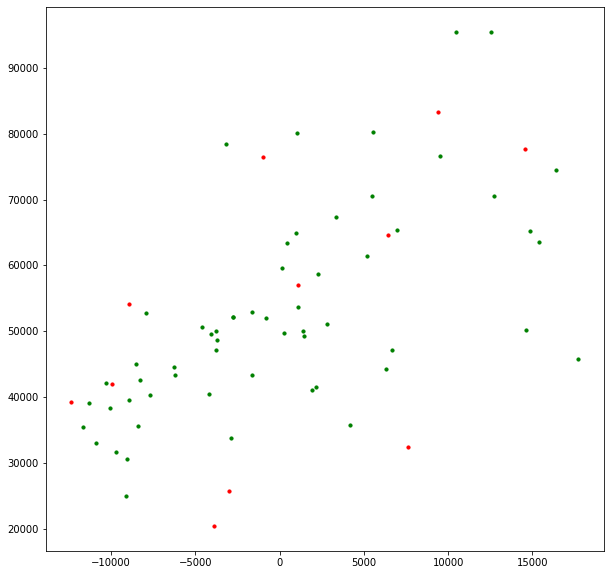

In [20]:
fig = plt.figure(figsize=(10, 10))
m1 = plt.scatter(fit_win_x, win_dataset.points, s=10, color="green")
m2 = plt.scatter(fit_lose_x, lose_dataset.points, s=10, color="red")
# m2 = plt.scatter(fit_lose_y, fit_lose_y, s=10)

In [10]:
model = linear_model.LinearRegression()

In [11]:
model.fit(X, Y)

LinearRegression()

In [12]:
y_pred_line_win = model.predict(win_dataset[X_components])
y_pred_line_lose = model.predict(lose_dataset[X_components])

In [13]:
fit_pred_win_X, fit_pred_win_Y = pca.fit_transform(win_dataset[X_components], pd.DataFrame(y_pred_line_win)[0]).T
fit_pred_lose_X, fit_pred_lose_Y = pca.fit_transform(lose_dataset[X_components], pd.DataFrame(y_pred_line_lose)[0]).T
# pca.transform(win_dataset[X_components], pd.DataFrame(y_pred_line_win)[0]).T

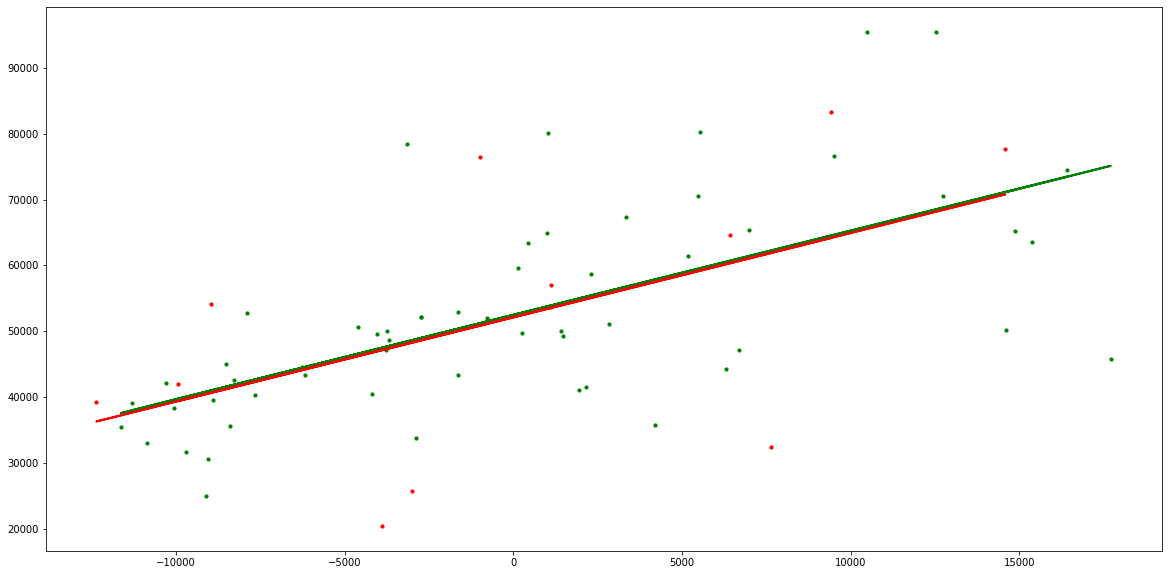

In [15]:
fig = plt.figure(figsize=(20, 10))
m1 = plt.scatter(fit_win_x, win_dataset.points, s=10, color="green")
m2 = plt.scatter(fit_lose_x, lose_dataset.points, s=10, color="red")
plt.plot(fit_pred_win_X, y_pred_line_win, color="green", linewidth=2, label="Prediction")
plt.plot(fit_pred_lose_X, y_pred_line_lose, color="red", linewidth=2, label="Prediction")

In [16]:
check_table = pd.DataFrame(columns=['win', 'time', 'points', 'new_points'])

In [17]:
test_data.points

69    51390
70    41780
71    34570
72    53500
73    32870
Name: points, dtype: int64

In [18]:
check_table.win = test_data.win
check_table.time = test_data.time
check_table.points = test_data.points
check_table.new_points = check_table.apply(lambda row: model.predict(pd.DataFrame(columns=X_components).append(row[X_components]))[0], axis=1)

In [19]:
check_table

,win,time,points,new_points
69,True,24534,51390,50144.794055
70,False,15666,41780,34223.129502
71,True,17376,34570,40982.361584
72,True,23610,53500,48962.049210
73,True,30882,32870,58270.404747
